In [1]:
import pandas as pd

# 创建一个空的DataFrame来存储所有年份的数据
all_names = pd.DataFrame()

# 遍历每一年
for year in range(1880, 2011):
    # 读取该年份的数据
    path = f'datasets/babynames/yob{year}.txt'
    names = pd.read_csv(path, names=['name', 'sex', 'births'])
    
    # 添加一个表示年份的列
    names['year'] = year
    
    # 将该年份的数据添加到all_names中
    all_names = pd.concat([all_names, names], ignore_index=True)

# 根据年份和性别对数据进行分组，然后计算每一组的出生总数
total_births = all_names.pivot_table('births', index='year', columns='sex', aggfunc=sum)

# 添加一个表示总体出生数的列
total_births['total'] = total_births['F'] + total_births['M']

total_births

sex,F,M,total
year,,,
1880,90993,110493,201486
1881,91955,100748,192703
1882,107851,113687,221538
1883,112322,104632,216954
1884,129021,114445,243466
...,...,...,...
2006,1896468,2050234,3946702
2007,1916888,2069242,3986130
2008,1883645,2032310,3915955


In [2]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# 添加一个表示男女性别比例的列
total_births['ratio'] = total_births['M'] / total_births['F']

# 分割训练集和测试集
train = total_births.loc[1880:1980]
test = total_births.loc[1981:2010]

# 提取特征和目标变量
X_train = train.index.values.reshape(-1, 1)
y_train = train['ratio']
X_test = test.index.values.reshape(-1, 1)

# 创建并训练模型
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

# 进行预测
predictions = model.predict(X_test_poly)

# 打印预测结果
for year, prediction in zip(range(1981, 2011), predictions):
    print(f"{year}年, 预测比例: {prediction}")

1981年, 预测比例: 1.1808455397705089
1982年, 预测比例: 1.1877536778170992
1983年, 预测比例: 1.194689396802751
1984年, 预测比例: 1.2016526967274785
1985年, 预测比例: 1.2086435775912463
1986年, 预测比例: 1.2156620393940756
1987年, 预测比例: 1.2227080821359806
1988年, 预测比例: 1.2297817058169258
1989年, 预测比例: 1.2368829104369325
1990年, 预测比例: 1.244011695996008
1991年, 预测比例: 1.2511680624941377
1992年, 预测比例: 1.2583520099313148
1993年, 预测比例: 1.2655635383075605
1994年, 预测比例: 1.2728026476228749
1995年, 预测比例: 1.2800693378772294
1996年, 预测比例: 1.2873636090706526
1997年, 预测比例: 1.2946854612031373
1998年, 预测比例: 1.3020348942746764
1999年, 预测比例: 1.30941190828527
2000年, 预测比例: 1.3168165032349393
2001年, 预测比例: 1.3242486791236487
2002年, 预测比例: 1.3317084359514268
2003年, 预测比例: 1.3391957737182523
2004年, 预测比例: 1.3467106924241605
2005年, 预测比例: 1.354253192069109
2006年, 预测比例: 1.3618232726531119
2007年, 预测比例: 1.3694209341761905
2008年, 预测比例: 1.3770461766383164
2009年, 预测比例: 1.3846990000395039
2010年, 预测比例: 1.39237940437976


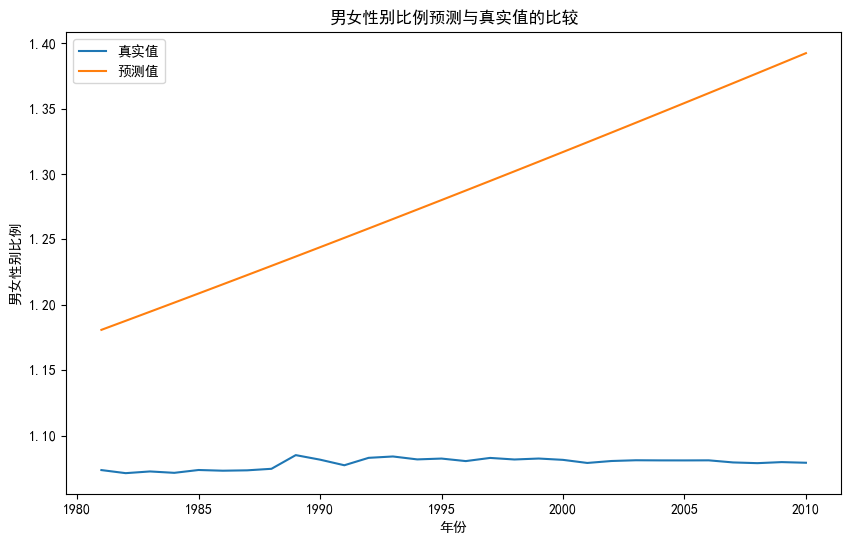

In [3]:
import matplotlib.pyplot as plt
import matplotlib

# 指定字体为SimHei
matplotlib.rcParams['font.sans-serif'] = ['SimHei']

# 计算测试集的真实值
y_test = test['ratio']

# 创建一个新的图形
plt.figure(figsize=(10, 6))

# 绘制真实值
plt.plot(X_test, y_test, label='真实值')

# 绘制预测值
plt.plot(X_test, predictions, label='预测值')

# 添加图例
plt.legend()

# 添加标题和标签
plt.title('男女性别比例预测与真实值的比较')
plt.xlabel('年份')
plt.ylabel('男女性别比例')

# 显示图形
plt.show()

均方误差（MSE）: 0.04605248335898812
根均方误差（RMSE）: 0.2145984234774061


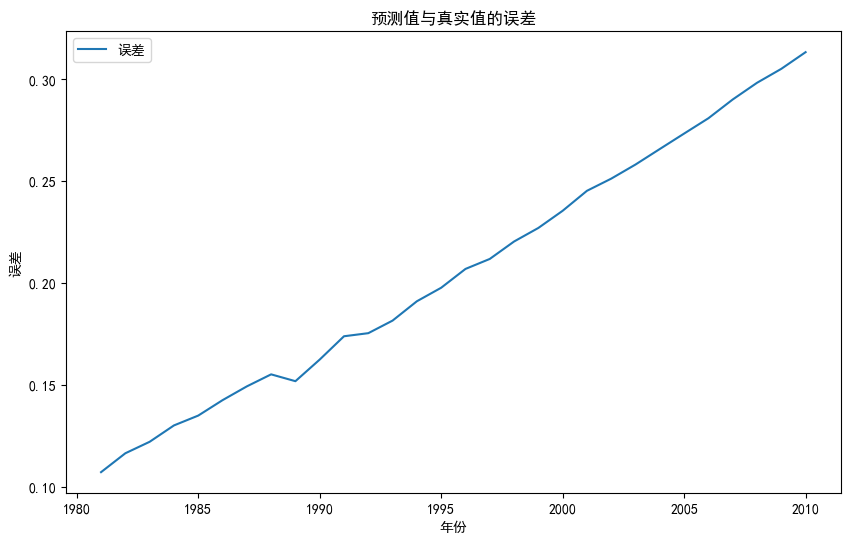

In [4]:
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.pyplot as plt

# 解决保存图像是负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False 
# 更改matplotlib的字体设置
matplotlib.rcParams['font.sans-serif'] = ['SimHei']

# 计算均方误差
mse = mean_squared_error(y_test, predictions)

# 计算根均方误差
rmse = np.sqrt(mse)

print(f"均方误差（MSE）: {mse}")
print(f"根均方误差（RMSE）: {rmse}")

# 计算每个预测值与真实值之间的误差
errors = predictions - y_test

# 创建一个新的图形
plt.figure(figsize=(10, 6))

# 绘制误差
plt.plot(X_test, errors, label='误差')

# 添加图例
plt.legend()

# 添加标题和标签
plt.title('预测值与真实值的误差')
plt.xlabel('年份')
plt.ylabel('误差')

# 显示图形
plt.show()